# Introduction

CV can discover patterns from given image or video

# Get the Data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-06-17 11:33:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   189MB/s    in 0.6s    

2023-06-17 11:33:03 (189 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# EDA Dataset

## part - 1 : Getting stastics about data

In [ ]:
from glob import glob
print("Number of trin pizza images :", len(glob("./pizza_steak/train/pizza/*")))
print("Number of trin steak images :", len(glob("./pizza_steak/train/steak/*")))
print("-"*20)
print("Number of test pizza images :", len(glob("./pizza_steak/test/pizza/*")))
print("Number of test steak images :", len(glob("./pizza_steak/test/steak/*")))

Number of trin pizza images : 750
Number of trin steak images : 750
--------------------
Number of test pizza images : 250
Number of test steak images : 250


## part -2 : Getting image quality (sample wise)

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class):
    path = "./pizza_steak/" + target_dir + "/" + target_class + "/*"
    sample_img = random.sample(glob(path),1)[0]
    img_np_array = mpimg.imread(sample_img)
    plt.imshow(img_np_array)
    plt.xticks([])
    plt.yticks([])
    print(sample_img , img_np_array.shape)

./pizza_steak/train/steak/3082120.jpg (384, 512, 3)
./pizza_steak/train/pizza/1890444.jpg (511, 512, 3)


Text(0.5, 1.0, 'Train Pizza Image')

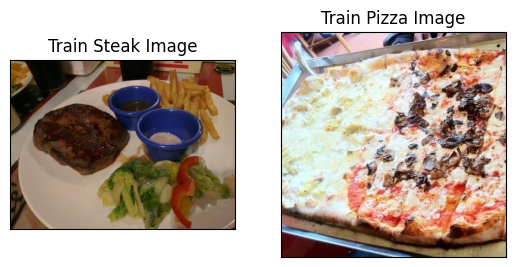

In [ ]:
plt.figure()
plt.subplot(1,2,1)
view_random_image(target_dir="train", target_class="steak")
plt.title("Train Steak Image")
plt.subplot(1,2,2)
view_random_image(target_dir="train", target_class="pizza")
plt.title("Train Pizza Image")

./pizza_steak/test/steak/3903517.jpg (512, 512, 3)
./pizza_steak/test/pizza/1183595.jpg (512, 512, 3)


Text(0.5, 1.0, 'Test Pizza Image')

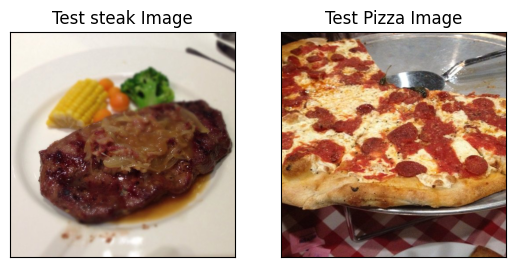

In [ ]:
plt.figure()
plt.subplot(1,2,1)
view_random_image(target_dir="test", target_class="steak")
plt.title("Test steak Image")
plt.subplot(1,2,2)
view_random_image(target_dir="test", target_class="pizza")
plt.title("Test Pizza Image")

## part -3 : Getting size of the images

In [ ]:
import pandas as pd
def get_size_of_image(target_dir, target_class):
    rows_list = []
    path = glob("./pizza_steak/" + target_dir + "/" + target_class + "/*")
    for img in path:
        img_np_array = mpimg.imread(img)
        rows_list.append([img,img_np_array.shape])

    return pd.DataFrame(rows_list,columns=["image_name", "image_size"])

In [ ]:
get_size_of_image(target_dir="train", target_class="pizza")["image_size"].unique()

array([(512, 512, 3), (306, 512, 3), (342, 512, 3), (512, 382, 3),
       (384, 512, 3), (383, 512, 3), (512, 384, 3), (410, 512, 3),
       (340, 512, 3), (512, 341, 3), (341, 512, 3), (512, 500, 3),
       (382, 512, 3), (366, 512, 3), (512, 424, 3), (512, 510, 3),
       (512, 306, 3), (512, 511, 3), (511, 512, 3), (512, 307, 3),
       (512, 505, 3), (512, 442, 3), (512, 383, 3), (289, 512, 3),
       (512, 289, 3), (288, 512, 3), (318, 512, 3), (287, 512, 3),
       (512, 288, 3), (461, 512, 3), (307, 512, 3), (512, 507, 3),
       (332, 512, 3), (509, 512, 3), (308, 512, 3), (385, 512, 3),
       (388, 512, 3), (434, 512, 3), (512, 287, 3), (446, 512, 3),
       (512, 508, 3), (432, 512, 3)], dtype=object)

In [ ]:
get_size_of_image(target_dir="train", target_class="steak")["image_size"].unique()

array([(512, 512, 3), (512, 382, 3), (384, 512, 3), (339, 512, 3),
       (512, 384, 3), (342, 512, 3), (499, 512, 3), (382, 512, 3),
       (512, 511, 3), (288, 512, 3), (343, 512, 3), (364, 512, 3),
       (512, 306, 3), (307, 512, 3), (306, 512, 3), (341, 512, 3),
       (385, 512, 3), (512, 308, 3), (512, 506, 3), (512, 288, 3),
       (471, 512, 3), (442, 512, 3), (511, 512, 3), (340, 512, 3),
       (289, 512, 3), (512, 341, 3), (396, 512, 3), (509, 512, 3),
       (512, 289, 3), (254, 512, 3), (354, 512, 3), (304, 512, 3),
       (287, 512, 3), (383, 512, 3), (333, 512, 3), (465, 512, 3),
       (262, 512, 3), (407, 512, 3), (436, 512, 3), (512, 383, 3),
       (512, 510), (308, 512, 3), (512, 509, 3), (512, 340, 3),
       (486, 512, 3), (512, 508, 3), (344, 512, 3), (512, 442, 3)],
      dtype=object)

In [ ]:
get_size_of_image(target_dir="test", target_class="pizza")["image_size"].unique()

array([(333, 512, 3), (341, 512, 3), (384, 512, 3), (512, 512, 3),
       (469, 512, 3), (512, 382, 3), (383, 512, 3), (382, 512, 3),
       (512, 384, 3), (512, 383, 3), (406, 512, 3), (329, 512, 3),
       (289, 512, 3), (385, 512, 3), (512, 511, 3), (511, 512, 3),
       (307, 512, 3), (340, 512, 3), (342, 512, 3), (512, 342, 3),
       (512, 289, 3), (391, 512, 3), (512, 443, 3), (344, 512, 3),
       (512, 306, 3), (335, 512, 3), (512, 510, 3), (512, 341, 3),
       (288, 512, 3)], dtype=object)

In [ ]:
get_size_of_image(target_dir="test", target_class="steak")["image_size"].unique()

array([(382, 512, 3), (512, 512, 3), (384, 512, 3), (512, 384, 3),
       (306, 512, 3), (512, 511, 3), (512, 306, 3), (308, 512, 3),
       (512, 382, 3), (342, 512, 3), (512, 503, 3), (307, 512, 3),
       (289, 512, 3), (512, 287, 3), (341, 512, 3), (512, 288, 3),
       (393, 512, 3), (418, 512, 3), (395, 512, 3), (502, 512, 3),
       (383, 512, 3), (512, 506, 3), (512, 289, 3), (288, 512, 3),
       (343, 512, 3), (511, 512, 3), (387, 512, 3), (512, 341, 3),
       (512, 383, 3)], dtype=object)

# Pre-Process Data

* Is normilization and reshapping requried ?

# Build, compile, fit and evaluate models

* Load our images
* Pre-process (reshape & normilize)
* Build, compile and fit and evaluate

## Load, pre-process images

In [ ]:
import tensorflow as tf


from tensorflow.keras.utils import image_dataset_from_directory

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [ ]:
tf.random.set_seed(42)
train_data, valid_data = image_dataset_from_directory(directory=train_dir,
                                                      image_size=(256,256),
                                                      batch_size=32,
                                                      shuffle=True,
                                                      seed=42,
                                                      validation_split=0.2,
                                                      subset="both"
                                                      )
test_data = image_dataset_from_directory(directory=test_dir,
                                                      image_size=(256,256),
                                                      batch_size=32,
                                                      shuffle=True,
                                                      seed=42,
                                                      )

Found 1500 files belonging to 2 classes.
Using 1200 files for training.
Using 300 files for validation.
Found 500 files belonging to 2 classes.


## Data Augmentaiton

In [ ]:
resize_and_normalize = tf.keras.Sequential(
                            [
                                tf.keras.layers.Resizing(height=256, width=256),
                                tf.keras.layers.Rescaling(scale=1./255),
                            ]
                                )
data_augmentation = tf.keras.Sequential(
                            [
                                tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=42),
                                tf.keras.layers.RandomRotation(factor=0.2,seed=42),
                                tf.keras.layers.RandomZoom(height_factor=0.2),
                            ]
                        )

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_normalize(x), y),
              num_parallel_calls=AUTOTUNE)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)



In [ ]:
train_data_aug = prepare(train_data, augment=True)
train_data=prepare(train_data,augment=False)
valid_data = prepare(valid_data, augment=False)
test_data = prepare(test_data, augment=False)

## Visulize the augmented Data

In [ ]:
def visulize_both_images(img1, img2):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.xlabel=[]
    plt.ylabel=[]
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.xlabel=[]
    plt.ylabel=[]

tf.Tensor([0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0], shape=(32,), dtype=int32)


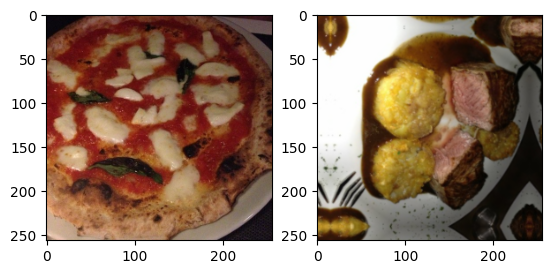

In [ ]:
img_num = random.randint(0, 32)

for x,y in train_data:
    img1 = x[img_num]
    print(y)
    break

for x,y in train_data_aug:
    img2 = x[img_num]
    print(y)
    break


visulize_both_images(img1, img2)

tf.Tensor([0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1], shape=(32,), dtype=int32)


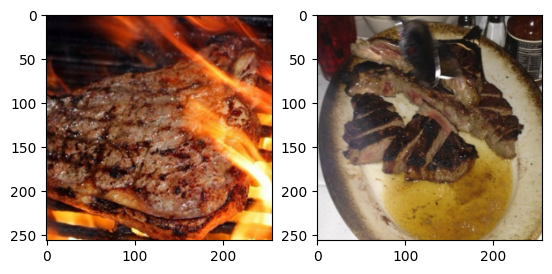

In [ ]:
img_num = random.randint(0, 32)

for x,y in valid_data:
    img1 = x[img_num]
    print(y)
    break

for x,y in test_data:
    img2 = x[img_num]
    print(y)
    break


visulize_both_images(img1, img2)

## Experiment - 1

In [ ]:
!nvidia-smi

Sat Jun 17 11:35:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    517MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                                tf.keras.Input(shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=1, activation="sigmoid")
                                ]
                              )

print(model_1.summary())

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_1 = model_1.fit(train_data, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 10)       

With CPU

Epoch 1/5
38/38 [==============================] - 117s 3s/step - loss: 0.6506 - accuracy: 0.6300 - val_loss: 0.5406 - val_accuracy: 0.7533

Epoch 2/5
38/38 [==============================] - 114s 3s/step - loss: 0.4928 - accuracy: 0.7742 - val_loss: 0.5822 - val_accuracy: 0.7167

Epoch 3/5
38/38 [==============================] - 114s 3s/step - loss: 0.4340 - accuracy: 0.8117 - val_loss: 0.5113 - val_accuracy: 0.7767

Epoch 4/5
38/38 [==============================] - 114s 3s/step - loss: 0.4000 - accuracy: 0.8333 - val_loss: 0.5524 - val_accuracy: 0.7500

Epoch 5/5
38/38 [==============================] - 111s 3s/step - loss: 0.3850 - accuracy: 0.8375 - val_loss: 0.5321 - val_accuracy: 0.7667


Evaluation

16/16 [==============================] - 19s 1s/step - loss: 0.3609 - accuracy: 0.8340
[0.36093080043792725, 0.8339999914169312]

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 62ms/step - loss: 0.3636 - accuracy: 0.8500


[0.3635919690132141, 0.8500000238418579]

<Axes: title={'center': 'Accuracy Plots'}>

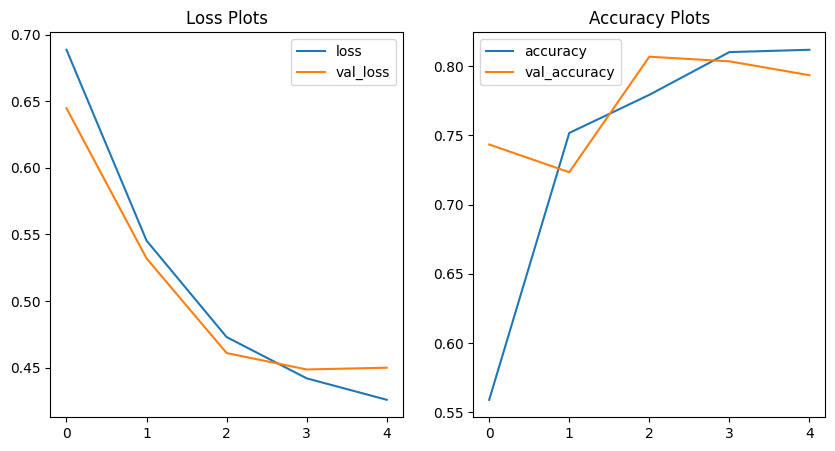

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_1.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_1.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

## Experiment - 2

Replicate the small model from previous session

In [ ]:

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=4, activation="relu"),
                                tf.keras.layers.Dense(units=4, activation="relu"),
                                tf.keras.layers.Dense(units=1, activation="sigmoid"),

                                ]
                              )

print(model_2.summary())

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_2 = model_2.fit(train_data, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 786436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
38/38 [==============================] - 7s 135ms/step - loss: 1.6652 - accuracy: 0.4975 - val_loss: 0.6929 - val_accuracy: 0.5367
Epoch 2/5
38/38 [=================

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 1s 42ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931501030921936, 0.5]

<Axes: title={'center': 'Accuracy Plots'}>

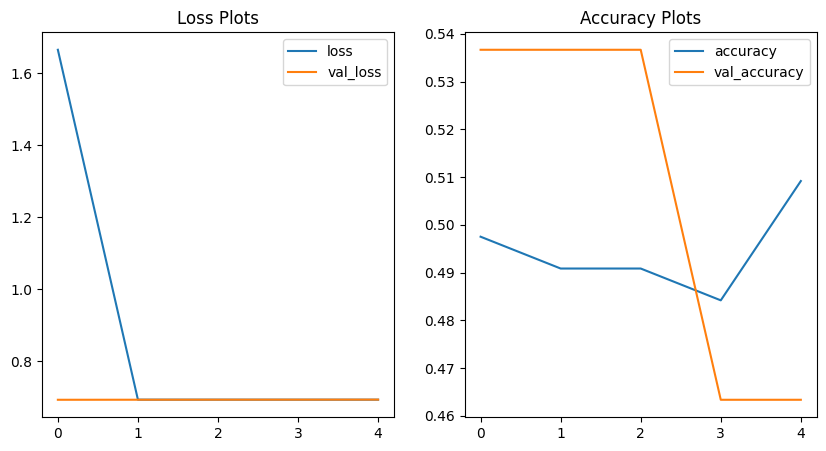

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_2.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_2.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

It is not working at all.

## Experiment -3

Upgrading the model_2 with more layers and more hidden units

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=100, activation="relu"),
                                tf.keras.layers.Dense(units=100, activation="relu"),
                                tf.keras.layers.Dense(units=100, activation="relu"),
                                tf.keras.layers.Dense(units=1, activation="sigmoid"),

                                ]
                              )

print(model_3.summary())

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_3 = model_3.fit(train_data, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               19660900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,681,201
Trainable params: 19,681,201
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
38/38 [====================

In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 1s 41ms/step - loss: 0.6430 - accuracy: 0.7040


[0.6429738998413086, 0.7039999961853027]

<Axes: title={'center': 'Accuracy Plots'}>

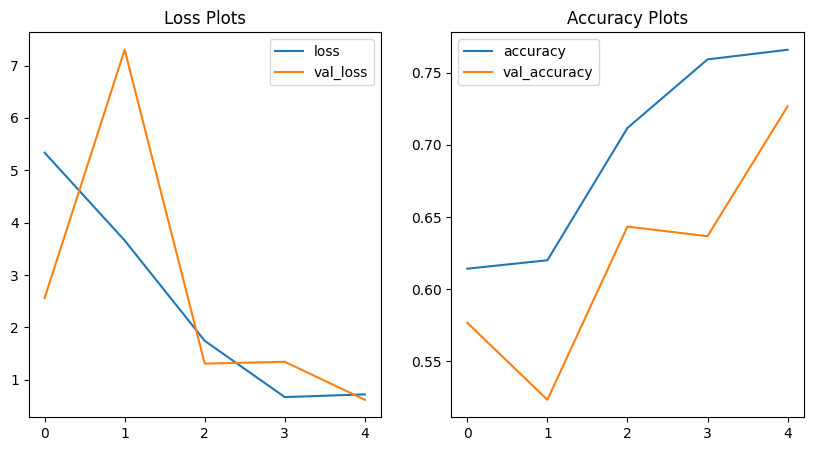

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_3.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_3.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

It is better than model_2 but not the best than model_1.

**Convolution networks do better for image data.**

## Experiment -4

Doing data augmentaton for model_1

### Visulize augmented data

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=1, activation="sigmoid")
                                ]
                              )

print(model_5.summary())

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_5 = model_5.fit(train_data_aug, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data_aug),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 10)      

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 50ms/step - loss: 0.3951 - accuracy: 0.8220


[0.39505741000175476, 0.8220000267028809]

<Axes: title={'center': 'Accuracy Plots'}>

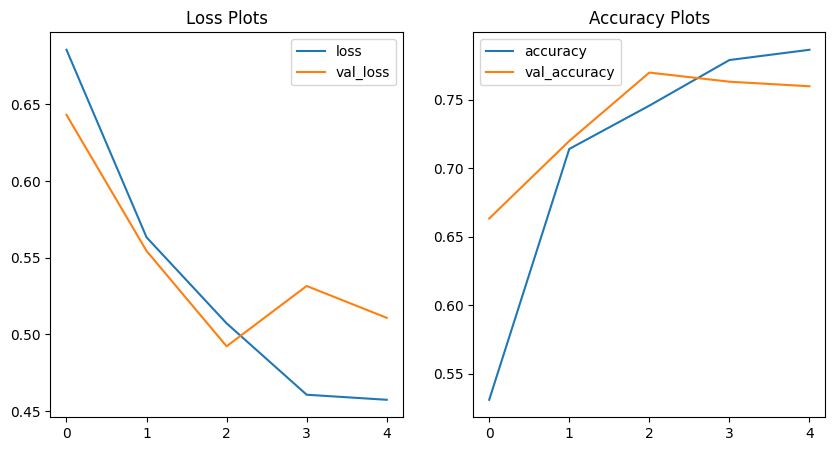

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_5.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_5.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

## Experiment - 6

Concatinating both real and augmented images and trianing the same model_5

In [ ]:
train_data_con = train_data.concatenate(train_data_aug)
train_data_con = train_data_con.shuffle(buffer_size=32)

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=1, activation="sigmoid")
                                ]
                              )

print(model_6.summary())

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_6 = model_6.fit(train_data_con, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data_con),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 10)      

In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 3s 69ms/step - loss: 0.3650 - accuracy: 0.8340


[0.36503586173057556, 0.8339999914169312]

<Axes: title={'center': 'Accuracy Plots'}>

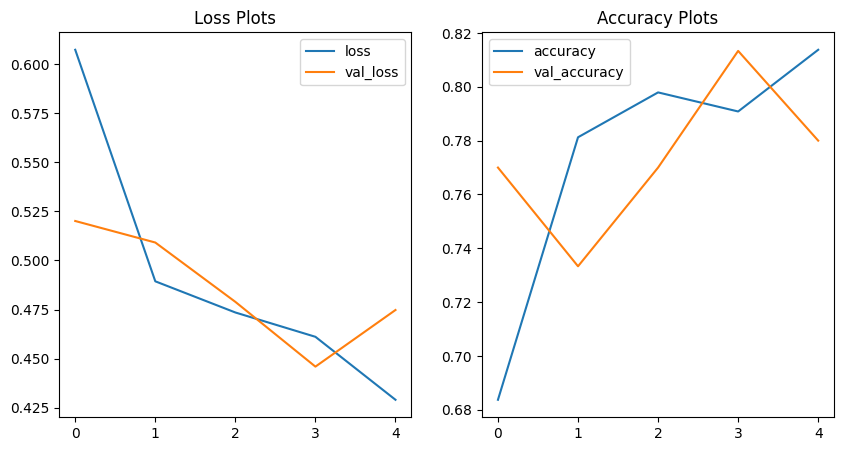

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_6.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_6.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

## Experiment -7

With concatinating augmented and normal images, with better model filters

In [ ]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=1, activation="sigmoid")
                                ]
                              )

print(model_7.summary())

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_7 = model_7.fit(train_data_con, epochs=5,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data_con),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 100)     2800      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 100)     90100     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 100)       90100     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 100)     

In [ ]:
model_7.evaluate(test_data)

16/16 [==============================] - 2s 114ms/step - loss: 0.3358 - accuracy: 0.8740


[0.33576110005378723, 0.8740000128746033]

<Axes: title={'center': 'Accuracy Plots'}>

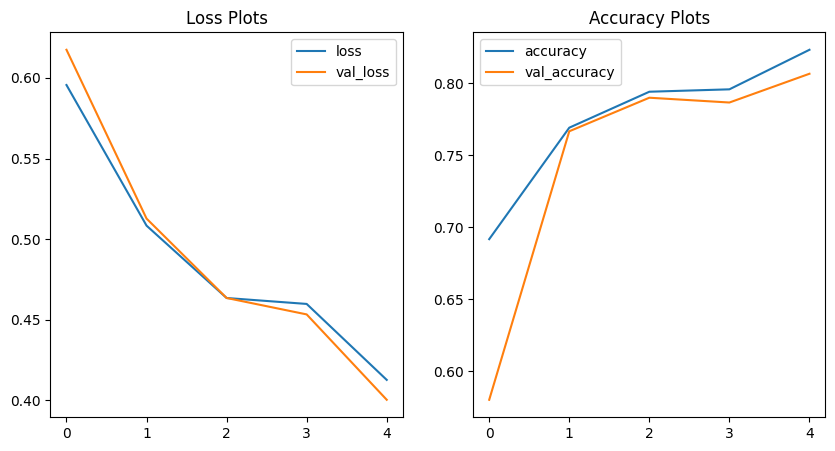

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(hist_7.history)[["loss","val_loss"]].plot(title="Loss Plots",ax=axes[0],figsize=(10,5))
pd.DataFrame(hist_7.history)[["accuracy","val_accuracy"]].plot(title="Accuracy Plots",ax=axes[1],figsize=(10,5))

## Experiement - 8

With more Epochs


In [ ]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=(256,256,3)),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=1, activation="sigmoid")
                                ]
                              )

print(model_8.summary())

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist_8 = model_8.fit(train_data_con, epochs=100,
                    validation_data= valid_data,
                    steps_per_epoch=len(train_data_con),
                    validation_steps=len(valid_data)
                    )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 100)     2800      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 100)     90100     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 100)       90100     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 100)     

KeyboardInterrupt: ignored

In [ ]:
model_8.evaluate(test_data)

16/16 [==============================] - 2s 58ms/step - loss: 0.2321 - accuracy: 0.9100


[0.23206166923046112, 0.9100000262260437]

It seems, if we train for more number of epochs, the training accuracy is increaseing little bit till 95%, but the validation accuracy stopeped at 86%. It is overfitting towards the training data (fi we trian for more number of epochs).

# Getting predicitons on custom images

In [ ]:
test_img_1 = "./pizza_steak/test/pizza/1001116.jpg"
test_img_2 = "./pizza_steak/test/steak/100274.jpg"
test_img_3 = "./pizza_steak/test/steak/6261.jpg"
test_img_4 = "./pizza_steak/test/steak/347745.jpg"
test_img_5 = "./pizza_steak/test/steak/912108.jpg"
test_img_6 = "./pizza_steak/test/steak/970916.jpg"

In [ ]:
def load_preProcc_img(img_path):
    test_img = tf.io.read_file(img_path)
    test_img = tf.image.decode_image(test_img)
    print("Input image size : ", test_img.shape)
    plt.imshow(test_img)
    plt.axis(False)
    test_img_resize = resize_and_normalize(test_img)
    print("Resized image size :", test_img_resize.shape)

    test_img_tf = tf.expand_dims(test_img_resize, axis=0)
    print("Expanded image size : ", test_img_tf.shape)
    return test_img_tf

Input image size :  (384, 512, 3)
Resized image size : (256, 256, 3)
Expanded image size :  (1, 256, 256, 3)
1/1 [==============================] - 0s 30ms/step
................  It is a Steak. ................


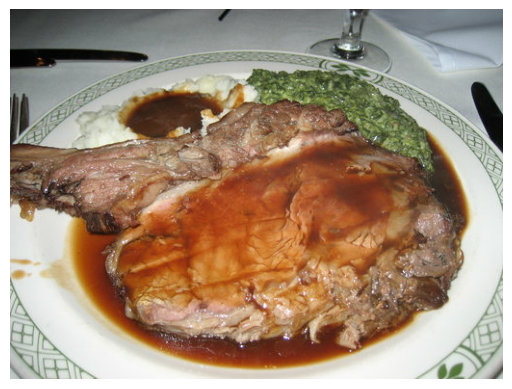

In [ ]:
img = load_preProcc_img(test_img_3)
if int(tf.round(model_8.predict(img))) == 0:
    print("................  It is a Pizza. ................")
else:
    print("................  It is a Steak. ................")